In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC


In [2]:
walmart_data = pd.read_csv('train.csv').head(100000)

pd.options.display.max_seq_items = 500
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [3]:
walmart_data.sample(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
36315,25,10854,Saturday,7.128485e+10,1,MENS WEAR,1515.0
74180,5,21053,Monday,3.101588e+10,2,PERSONAL CARE,205.0
29210,5,9004,Saturday,NaN,1,PHARMACY RX,NaN
13161,44,4403,Friday,8.805523e+11,1,LADIESWEAR,313.0
4490,20,1716,Friday,2.245700e+10,1,SERVICE DELI,7005.0


In [4]:
walmart_data.DepartmentDescription.value_counts()

GROCERY DRY GOODS              11148
DSD GROCERY                    10292
PRODUCE                         7955
DAIRY                           6824
PERSONAL CARE                   6319
IMPULSE MERCHANDISE             4234
HOUSEHOLD CHEMICALS/SUPP        4046
PHARMACY OTC                    3634
FROZEN FOODS                    3168
HOUSEHOLD PAPER GOODS           2504
COMM BREAD                      2406
BEAUTY                          2056
FINANCIAL SERVICES              1807
MENS WEAR                       1742
INFANT CONSUMABLE HARDLINES     1606
PETS AND SUPPLIES               1581
MEAT - FRESH & FROZEN           1547
SERVICE DELI                    1543
CANDY, TOBACCO, COOKIES         1501
CELEBRATION                     1434
PRE PACKED DELI                 1434
COOK AND DINE                   1303
LADIESWEAR                      1223
BAKERY                          1161
OFFICE SUPPLIES                 1098
HOME MANAGEMENT                 1087
INFANT APPAREL                   921
T

In [5]:
department_counts = walmart_data['DepartmentDescription'].value_counts()
top_department_counts = department_counts[:5]
len(department_counts)

67

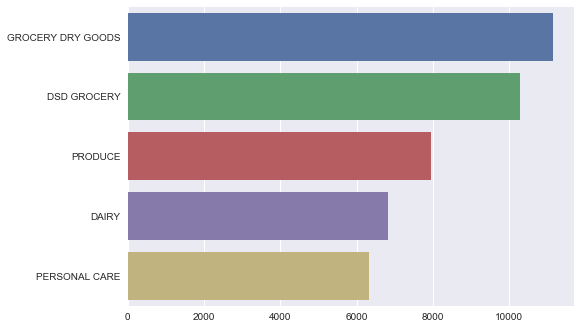

In [6]:
sns.barplot(y=top_department_counts.index, x=top_department_counts.values, orient="h")
sns.plt.show()

In [7]:
walmart_data.Weekday.value_counts()

Sunday      27094
Saturday    23616
Monday      20440
Friday      19949
Tuesday      8901
Name: Weekday, dtype: int64

In [8]:
weekday_counts = walmart_data['Weekday'].value_counts()
top_weekday_counts = weekday_counts[:7]
len(weekday_counts)

5

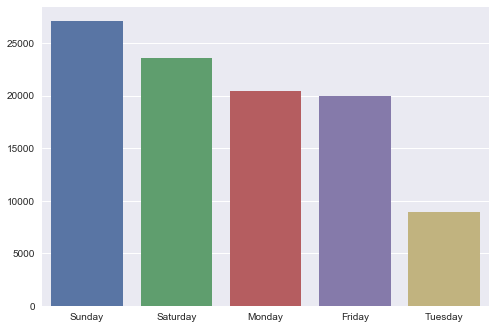

In [9]:
sns.barplot(x=top_weekday_counts.index, y=top_weekday_counts.values)
sns.plt.show()

In [10]:
walmart_data.TripType.value_counts()

40     28588
39     14654
37      5727
38      4610
25      3926
7       3467
8       3366
24      3058
42      2987
44      2982
36      2940
999     2711
9       2399
32      2176
5       2107
35      1666
33      1561
3       1298
15      1148
27      1060
43       939
41       868
30       639
34       637
21       614
6        537
22       472
20       468
18       459
26       432
29       361
28       322
31       312
4        228
19       201
23        51
14        29
Name: TripType, dtype: int64

In [11]:
trip_type_counts = walmart_data['TripType'].value_counts()
top_trip_type_counts = trip_type_counts[:37]
len(trip_type_counts)

#There are 37 potential different trip type categories that customers use.

37

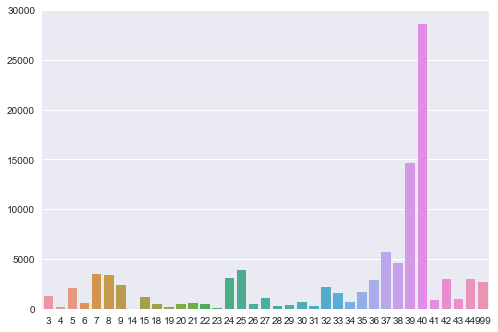

In [12]:
sns.barplot(x=top_trip_type_counts.index, y=top_trip_type_counts.values)
sns.plt.show()

In [13]:
walmart_data[walmart_data.TripType == 40].sample(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
9446,40,3264,Friday,7.427978e+10,1,HOUSEHOLD CHEMICALS/SUPP,7010.0
96957,40,27966,Tuesday,7.575280e+10,1,GROCERY DRY GOODS,4291.0
84374,40,24088,Monday,2.600000e+09,1,OFFICE SUPPLIES,6683.0
86517,40,24680,Monday,4.470036e+09,2,PRE PACKED DELI,7651.0
63055,40,17786,Sunday,4.800141e+09,1,GROCERY DRY GOODS,4292.0


In [14]:
walmart_data.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [15]:
# Applying a function to several columns, creating a new columns as an output

def departments(row):
    if row['DepartmentDescription'] in {'GROCERY DRY GOODS', 'DSD GROCERY', 'PRODUCE', 'DAIRY', 'FROZEN FOODS',
                                        'COMM BREAD', 'SERVICE DELI', 'CANDY, TOBACCO, COOKIES', 'MEAT - FRESH & FROZEN', 'PRE PACKED DELI', 'COOK AND DINE',
                                        'BAKERY', 'LIQUOR,WINE,BEER', 'SEAFOOD'}:
        return 'FoodAndDrink'
    elif row['DepartmentDescription'] in {'PERSONAL CARE', 'PHARMACY OTC', 'BEAUTY', 'PHARMACY RX', 'HEALTH AND BEAUTY AIDS'}:
        return 'Health'
    elif row['DepartmentDescription'] in {'JEWELRY AND SUNGLASSES', 'ACCESSORIES', 'OPTICAL - FRAMES', 'OPTICAL - LENSES'}:
        return 'Accesories'
    elif row['DepartmentDescription'] in {'LADIESWEAR', 'MENS WEAR', 'INFANT APPAREL', 'GIRLS WEAR, 4-6X AND 7-14', 'BOYS WEAR',
                                          'SLEEPWEAR/FOUNDATIONS', 'BRAS & SHAPEWEAR', 'SWIMWEAR/OUTERWEAR', 'LADIES SOCKS', 
                                          'PLUS AND MATERNITY', 'SHEER HOSIERY', 'MENSWEAR'}:
        return 'Clothing'
    elif row['DepartmentDescription'] in {'SHOES'}:
        return 'Shoes'
    elif row['DepartmentDescription'] in {'IMPULSIVE MERCHANDISE'}:
        return 'Impulsive Merchandise'
    elif row['DepartmentDescription'] in {'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS', 'OFFICE SUPPLIES', 'HOME MANAGEMENT', 'BATH AND SHOWER',
                                          'HOME DÉCOR', 'LARGE HOUSEHOLD GOODS', 'BEDDING', 'PAINT AND ACCESSORIES', 'FURNITURE'}:
        return 'HouseholdSupplies'
    elif row['DepartmentDescription'] in {'FINANCIAL SERVICES'}:
        return 'FinancialServices'
    elif row['DepartmentDescription'] in {'PETS AND SUPPLIES'}:
        return 'PetsAndSupplies'
    elif row['DepartmentDescription'] in {'CELEBRATION'}:
        return 'Party'
    elif row['DepartmentDescription'] in {'TOYS'}:
        return 'Children'
    elif row['DepartmentDescription'] in {'AUTOMOTIVE'}:
        return 'Automotive'
    elif row['DepartmentDescription'] in {'LAWN AND GARDEN', 'HORTICULTURE AND ACCESS'}:
        return 'Outdoors'
    elif row['DepartmentDescription'] in {'SPORTING GOODS'}:
        return 'Sports'
    elif row['DepartmentDescription'] in {'ELECTRONICS', 'MEDIA AND GAMING', 'WIRELESS', 'PLAYERS AND ELECTRONICS', 'CAMERAS AND SUPPLIES'}:
        return 'Electronics'
    elif row['DepartmentDescription'] in {'FABRICS AND CRAFTS', 'HARDWARE'}:
        return 'FabricsAndCrafts'
    elif row['DepartmentDescription'] in {'BOOKS AND MAGAZINES', '1-HR PHOTO'}:
        return 'Other'
    elif row['DepartmentDescription'] in {'CONCEPT STORES'}:
        return 'Concept Stores'
    elif row['DepartmentDescription'] in {'SEASONAL'}:
        return 'Seasonal'
    else:
        return 'OtherDepartments'

walmart_data['NewDescription'] = walmart_data.apply(departments, axis=1)
walmart_data.head()                             


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,NewDescription
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,FinancialServices
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0,Shoes
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0,Health
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0,HouseholdSupplies
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0,HouseholdSupplies


In [16]:
walmart_data.NewDescription.value_counts()

FoodAndDrink         51182
Health               12432
HouseholdSupplies    10185
OtherDepartments      7381
Clothing              5567
FinancialServices     1807
FabricsAndCrafts      1663
PetsAndSupplies       1581
Outdoors              1574
Party                 1434
Electronics           1124
Children               896
Shoes                  867
Automotive             818
Sports                 667
Accesories             608
Other                  205
Concept Stores           5
Seasonal                 4
Name: NewDescription, dtype: int64

In [17]:
categories_counts = walmart_data['NewDescription'].value_counts()
top_categories_counts = categories_counts[:5]
len(categories_counts)

19

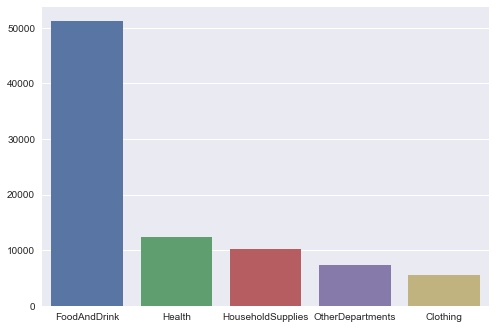

In [18]:
sns.barplot(x=top_categories_counts.index, y=top_categories_counts.values)
sns.plt.show()

In [19]:
walmart_data.Upc.value_counts().head(3)

4.011000e+03    1155
7.874235e+09     308
7.874235e+09     274
Name: Upc, dtype: int64

In [20]:
walmart_data.head(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,NewDescription
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,FinancialServices
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0,Shoes
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0,Health
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0,HouseholdSupplies
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0,HouseholdSupplies


In [21]:
department_types = list(set(walmart_data['NewDescription']) - {np.nan}) #puts the departments description into a list and get rid of any duplicates.
for dept in department_types: #for each department in department types.   # - np.nan. 
    walmart_data[dept] = 0 #assign new data frame to zero. 

In [22]:
for index, row in walmart_data.iterrows():  #it goes through the rows in a dataframe. 
    col_name = row['NewDescription'] #Column name is equal to the rows of the certain department.
    if not pd.isnull(col_name): #If theres not missing values in the rows.
        walmart_data.loc[index, col_name] += walmart_data.loc[index, 'ScanCount']

In [23]:
walmart_data.head(3)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,NewDescription,OtherDepartments,Sports,FabricsAndCrafts,Accesories,Party,Shoes,Electronics,Automotive,FoodAndDrink,Clothing,Outdoors,Seasonal,FinancialServices,Children,HouseholdSupplies,Other,Concept Stores,Health,PetsAndSupplies
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,FinancialServices,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0,Shoes,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0,Health,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [24]:
def my_mode(series):
    if type(series.mode()) is pd.Series:
        if len(series.mode()) > 0:
            return np.random.choice(series.mode())
        else:
            return 0
    else:
        return series.mode()

walmart_by_visit_num_df = walmart_data.groupby('VisitNumber') #Firstly group by with the visit number.
function_map = {dept: np.sum for dept in department_types}
function_map['Weekday'] = pd.Series.mode 
function_map['FinelineNumber'] = my_mode #relates to the average with classification categories. 
function_map['TripType'] = pd.Series.mode #relates to the trip type categories.
walmart_by_visit_num_df = walmart_by_visit_num_df.agg(function_map)

In [25]:
walmart_by_visit_num_df.sample(10)

,OtherDepartments,Sports,FabricsAndCrafts,Accesories,Party,Shoes,Electronics,Automotive,FoodAndDrink,Clothing,Outdoors,Seasonal,FinancialServices,Children,HouseholdSupplies,Other,Concept Stores,Health,PetsAndSupplies,Weekday,FinelineNumber,TripType
VisitNumber,,,,,,,,,,,,,,,,,,,,,,
14822,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,Sunday,5501.0,8
8313,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Saturday,1001.0,999
9487,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,Saturday,5017.0,7
9856,0,0,0,0,0,0,0,0,8,0,0,0,0,0,1,0,0,0,0,Saturday,5017.0,7
15906,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,Sunday,5004.0,34
24145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Monday,2240.0,999
28456,4,0,2,0,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,Tuesday,4212.0,26
12754,0,0,0,0,0,0,0,0,12,1,0,0,0,0,2,0,0,4,0,Saturday,1300.0,40
1099,0,0,0,0,0,0,0,0,13,0,0,0,0,0,9,0,0,1,0,Friday,4252.0,37


In [26]:
# Convert the categorical weekday variable into a dummy variable
walmart_by_visit_num_df.dropna(subset=['Weekday'], inplace=True)
dummy_df = pd.get_dummies(walmart_by_visit_num_df['Weekday'])
walmart = pd.concat([walmart_by_visit_num_df, dummy_df], axis=1)
walmart.sample(5)

,OtherDepartments,Sports,FabricsAndCrafts,Accesories,Party,Shoes,Electronics,Automotive,FoodAndDrink,Clothing,Outdoors,Seasonal,FinancialServices,Children,HouseholdSupplies,Other,Concept Stores,Health,PetsAndSupplies,Weekday,FinelineNumber,TripType,Friday,Monday,Saturday,Sunday,Tuesday
VisitNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,
13233,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,Sunday,6501.0,5,0,0,0,1,0
14677,0,0,0,0,0,0,0,0,39,0,0,0,0,0,0,1,0,7,6,Sunday,7958.0,40,0,0,0,1,0
11351,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Saturday,9101.0,8,0,0,1,0,0
13321,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,Sunday,970.0,25,0,0,0,1,0
22463,1,0,0,0,0,0,0,0,0,8,0,0,1,1,0,0,0,16,0,Monday,9107.0,25,0,1,0,0,0


In [27]:
walmart.Weekday.value_counts()

Sunday      3426
Saturday    3352
Friday      3172
Monday      2986
Tuesday     1586
Name: Weekday, dtype: int64

In [28]:
walmart.columns

Index(['OtherDepartments', 'Sports', 'FabricsAndCrafts', 'Accesories', 'Party',
       'Shoes', 'Electronics', 'Automotive', 'FoodAndDrink', 'Clothing',
       'Outdoors', 'Seasonal', 'FinancialServices', 'Children',
       'HouseholdSupplies', 'Other', 'Concept Stores', 'Health',
       'PetsAndSupplies', 'Weekday', 'FinelineNumber', 'TripType', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Tuesday'],
      dtype='object')

In [29]:
X_df = walmart[['Sports', 'Other', 'Outdoors', 'Clothing', 'Concept Stores',
       'PetsAndSupplies', 'Health', 'HouseholdSupplies', 'Children', 'Shoes',
       'Automotive', 'OtherDepartments', 'FinancialServices', 'Electronics',
       'Seasonal', 'Accesories', 'Party', 'FoodAndDrink', 'FabricsAndCrafts',
       'FinelineNumber', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Tuesday']]
X = np.array(X_df)

In [30]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [31]:
y = walmart['TripType']
y = np.array(y)

In [32]:
y

array([999,  30,  26, ..., 999,  39,  40])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_actual = y_test

In [34]:
for a, b in zip(X_train[:5], y_train[:5]):
    print(a,b)

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    2.    0.    0.    0.    0.    0.    0.  280.    1.    0.    0.    0.
    0.] 999
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   2.00000000e+00
   0.00000000e+00   0.00000000e+00   4.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.40000000e+01   0.00000000e+00   9.70400000e+03
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
   0.00000000e+00] 40
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.00000000e+00
   0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.09000000e+03
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000

In [35]:
model = DecisionTreeClassifier(min_samples_leaf=10).fit(X_train, y_train)

In [36]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_actual, y_pred))

[[224   0   0 ...,   0   0   1]
 [  0  20   1 ...,   0   0   0]
 [  0   6 150 ...,   0   1   0]
 ..., 
 [  0   0   3 ...,   0   1   0]
 [  0   0   2 ...,   0   4   0]
 [ 15   3   3 ...,   0   0 301]]


In [37]:
print(np.mean(y_pred_train == y_train))
print(np.mean(y_pred == y_test))

0.62843089031
0.546017902226


In [38]:
print(classification_report(y_test,
                            y_pred))

             precision    recall  f1-score   support

          3       0.83      0.99      0.90       226
          4       0.49      0.80      0.61        25
          5       0.58      0.66      0.62       227
          6       0.50      0.34      0.40        56
          7       0.47      0.52      0.49       257
          8       0.59      0.82      0.69       542
          9       0.59      0.64      0.61       403
         15       0.20      0.02      0.04        49
         18       0.00      0.00      0.00        25
         19       0.33      0.11      0.17        18
         20       0.41      0.30      0.35        23
         21       0.30      0.38      0.33        24
         22       0.57      0.32      0.41        25
         23       0.25      0.17      0.20         6
         24       0.19      0.14      0.16       129
         25       0.44      0.63      0.52       150
         26       0.00      0.00      0.00        20
         27       0.67      0.60      0.63   

/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
walmart_data[walmart_data.ScanCount < 0].head(5)

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,NewDescription,OtherDepartments,Sports,FabricsAndCrafts,Accesories,Party,Shoes,Electronics,Automotive,FoodAndDrink,Clothing,Outdoors,Seasonal,FinancialServices,Children,HouseholdSupplies,Other,Concept Stores,Health,PetsAndSupplies
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,FinancialServices,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0
9,26,8,Friday,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0,HouseholdSupplies,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0
14,26,8,Friday,8.867930e+10,-1,PAINT AND ACCESSORIES,3504.0,HouseholdSupplies,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,0,0
297,9,132,Friday,6.454161e+10,-1,CELEBRATION,6.0,Party,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
299,9,132,Friday,6.700886e+09,-1,CELEBRATION,6.0,Party,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
gb_model = GradientBoostingClassifier(n_estimators=100, max_leaf_nodes=10).fit(X_train, y_train)

In [41]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_actual, y_pred))

[[224   0   0 ...,   0   0   1]
 [  0  20   1 ...,   0   0   0]
 [  0   6 150 ...,   0   1   0]
 ..., 
 [  0   0   3 ...,   0   1   0]
 [  0   0   2 ...,   0   4   0]
 [ 15   3   3 ...,   0   0 301]]


In [42]:
print(np.mean(y_pred_train == y_train))
print(np.mean(y_pred == y_test))

0.62843089031
0.546017902226


In [43]:
print(classification_report(y_test,
                            y_pred))

             precision    recall  f1-score   support

          3       0.83      0.99      0.90       226
          4       0.49      0.80      0.61        25
          5       0.58      0.66      0.62       227
          6       0.50      0.34      0.40        56
          7       0.47      0.52      0.49       257
          8       0.59      0.82      0.69       542
          9       0.59      0.64      0.61       403
         15       0.20      0.02      0.04        49
         18       0.00      0.00      0.00        25
         19       0.33      0.11      0.17        18
         20       0.41      0.30      0.35        23
         21       0.30      0.38      0.33        24
         22       0.57      0.32      0.41        25
         23       0.25      0.17      0.20         6
         24       0.19      0.14      0.16       129
         25       0.44      0.63      0.52       150
         26       0.00      0.00      0.00        20
         27       0.67      0.60      0.63   

/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
model = LinearSVC().fit(X_train, y_train)

In [45]:
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_actual, y_pred))

[[176   0   2 ...,   0   0  20]
 [  0   0  23 ...,   0   0   0]
 [  0   0 164 ...,   0   0   0]
 ..., 
 [  0   0   3 ...,   0   0   0]
 [  0   0   2 ...,   0   1   0]
 [ 37   0  69 ...,   0   0 106]]


In [46]:
print(np.mean(y_pred_train == y_train))
print(np.mean(y_pred == y_test))

0.247122479095
0.244434243746


In [47]:
print(classification_report(y_test,
                            y_pred))

             precision    recall  f1-score   support

          3       0.78      0.78      0.78       226
          4       0.00      0.00      0.00        25
          5       0.28      0.72      0.40       227
          6       0.00      0.00      0.00        56
          7       0.00      0.00      0.00       257
          8       0.15      0.73      0.25       542
          9       0.13      0.02      0.03       403
         15       0.50      0.24      0.33        49
         18       1.00      0.04      0.08        25
         19       0.00      0.00      0.00        18
         20       0.50      0.39      0.44        23
         21       0.00      0.00      0.00        24
         22       0.00      0.00      0.00        25
         23       0.00      0.00      0.00         6
         24       0.00      0.00      0.00       129
         25       0.54      0.29      0.38       150
         26       0.00      0.00      0.00        20
         27       0.61      0.30      0.40   

/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
len(walmart_data.FinelineNumber.unique())

4340

In [49]:
#Get the top 10 feature importances
# zip returns an iterator in Python 3 (so as not to waste memory by creating all elements
# unnecessarily), hence the conversion into a list
features_importances = list(zip(X_df.columns, gb_model.feature_importances_))
features_importances.sort(key=lambda x:x[1], reverse=True)
features_importances[:10]

[('FinelineNumber', 0.39068574477314427),
 ('FoodAndDrink', 0.11361133390399758),
 ('HouseholdSupplies', 0.06315075586372601),
 ('Health', 0.057151472195675887),
 ('OtherDepartments', 0.045414319157305406),
 ('Clothing', 0.038189208066778377),
 ('Electronics', 0.030458787508047695),
 ('FabricsAndCrafts', 0.024041358910723235),
 ('Outdoors', 0.021028673695070946),
 ('Party', 0.019638701718520134)]

In [50]:
feature_counts = features_importances[:10]
len(feature_counts)

features = []
importances = []

for name,numbers in features_importances[:10]:
    features.append(name)
    importances.append(numbers)
    
print(features)
print(importances)

['FinelineNumber', 'FoodAndDrink', 'HouseholdSupplies', 'Health', 'OtherDepartments', 'Clothing', 'Electronics', 'FabricsAndCrafts', 'Outdoors', 'Party']
[0.39068574477314427, 0.11361133390399758, 0.06315075586372601, 0.057151472195675887, 0.045414319157305406, 0.038189208066778377, 0.030458787508047695, 0.024041358910723235, 0.021028673695070946, 0.019638701718520134]


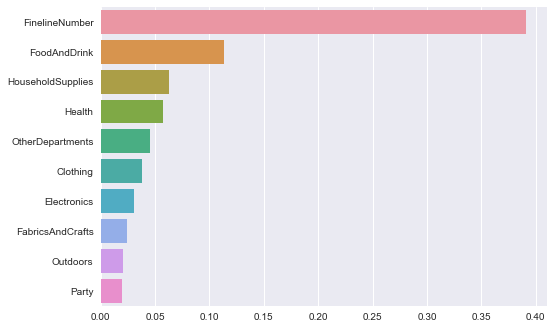

In [51]:
sns.barplot(y=features, x=importances, orient="h")
sns.plt.show()